[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,MA,10_ma,27_ma
Date,,,,,,,,,
1993-12-20,26.370300,46.625000,46.656250,46.500000,46.531250,68800,45.481563,46.665625,46.543981
1993-12-21,26.281933,46.468750,46.562500,46.406250,46.562500,205700,45.485937,46.628125,46.547454
1993-12-22,26.458681,46.781250,46.812500,46.500000,46.593750,410300,45.491406,46.621875,46.554398
1993-12-23,26.440998,46.750000,46.843750,46.687500,46.750000,533800,45.497344,46.628125,46.561343
1993-12-27,26.582397,47.000000,47.000000,46.750000,46.750000,447100,45.506875,46.668750,46.569444
...,...,...,...,...,...,...,...,...,...
2026-01-06,691.809998,691.809998,692.320007,687.780029,687.929993,69273800,628.754400,687.295996,683.890001
2026-01-07,689.580017,689.580017,693.960022,689.320007,692.190002,75588300,629.382401,687.770996,684.256669
2026-01-08,689.510010,689.510010,690.619995,687.489990,688.820007,64019200,629.959550,687.925995,684.483335


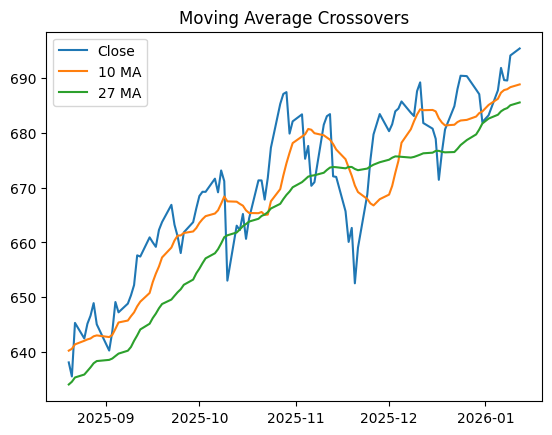

In [13]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

TICKER = 'SPY' # name of the ticker
WINDOW = 200 # global variable for moving average window size
FAST = 10
SLOW = 27
LOOKBACK = 100 # number of days to lookback at 

def get_data(): # download data 
  df = yf.download(TICKER, period="max", group_by="column", auto_adjust=False)

    # Flatten MultiIndex columns if yfinance returns them
  if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

    # Make sure Close is a 1D numeric Series
    close = df['Close'].astype(float)
    df['MA'] = close.rolling(WINDOW).mean()
  return df.dropna()

# adding fast ans slow collumns based on the chosen window sizes
def add_moving_averages(df, fast, slow):
  df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean() # add fast moving average
  df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean() # add slow moving average

  # definig a subset for plotting
  subset = df.iloc[-LOOKBACK:, :]

  plt.plot(subset['Close'])
  plt.plot(subset[f'{FAST}_ma'])
  plt.plot(subset[f'{SLOW}_ma'])

  plt.legend(['Close', f'{FAST} MA', f'{SLOW} MA'])
  plt.title('Moving Average Crossovers')

  return df.dropna()

df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df


Text(0.5, 1.0, 'Moving Average Crossovers')

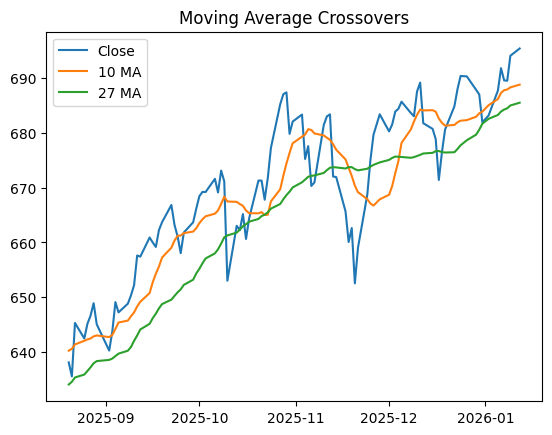

In [12]:

subsection = df.iloc[-100:, :]

plt.plot(subsection['Close'])
plt.plot(subsection[f'{FAST}_ma'])
plt.plot(subsection[f'{SLOW}_ma'])

plt.legend(['Close', f'{FAST} MA', f'{SLOW} MA'])
plt.title('Moving Average Crossovers')

In [ ]:
def add_strategy(df):
    close = df['Close'].astype(float)
    ma = df['MA'].astype(float)

    df['Strategy'] = np.where(close.to_numpy() > ma.to_numpy(), 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df): # test strategy performance and plot returns
  df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
  df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1 # shift by 1 to avoid lookahead bias 

  # plotting returns 
  plt.plot(df['asset_cumulative'])
  plt.plot(df['strategy_cumulative'])
  plt.legend([f'{TICKER} Cumulative Return', f'{WINDOW} Moving Average Cumulative Returns'])
  return df

def main():
  df = get_data()
  df = add_strategy(df)
  df = test_strategy(df)
  return df

main()